In [1]:
from sklearn.model_selection import cross_val_score

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
X = iris.data
y = iris.target

In [5]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [6]:
print(scores.mean())

0.9666666666666668


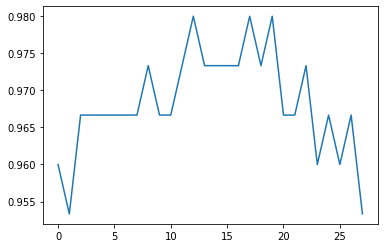

In [7]:
import numpy as np
k_range = range(1,29)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    # print(scores.mean())
    k_scores.append(scores.mean())
import matplotlib.pyplot as plt
plt.plot(k_scores)

In [8]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

0.9533333333333334


Cross validation for feature selection

In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [10]:
data = pd.read_csv('https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv')
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [11]:
feature_cols = ['TV', 'Radio', 'Newspaper']

X = data[feature_cols]
y = data['Sales']

In [12]:
lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')
print(scores)

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


In [13]:
mse_scores = -scores
mse_scores

array([3.56038438, 3.29767522, 2.08943356, 2.82474283, 1.3027754 ,
       1.74163618, 8.17338214, 2.11409746, 3.04273109, 2.45281793])

In [14]:
rmse_scores = np.sqrt(mse_scores)
rmse_scores

array([1.88689808, 1.81595022, 1.44548731, 1.68069713, 1.14139187,
       1.31971064, 2.85891276, 1.45399362, 1.7443426 , 1.56614748])

In [15]:
rmse_scores.mean()

1.6913531708051797

In [16]:
feature_cols = ['TV', 'Radio']
X = data[feature_cols]
print((np.sqrt(-cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')).mean()))

1.6796748419090766
